<a href="https://colab.research.google.com/github/nabbyz/Customer_Segmentation_using_K_Means_Clustering/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [4]:
data=pd.read_csv('Mall_Customers.csv')

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.shape

(200, 5)

In [10]:
data1=data.sample(n=150)

In [11]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
154,155,Female,47,78,16
76,77,Female,45,54,53
105,106,Female,21,62,42
163,164,Female,31,81,93
86,87,Female,55,57,58


In [12]:
data1.shape

(150, 5)

In [17]:
data1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,150.000000,150.000000,150.000000,150.000000
mean,100.446667,38.413333,60.600000,50.386667
std,59.353625,13.253940,27.130062,25.953698
min,1.000000,18.000000,15.000000,1.000000
25%,47.500000,28.000000,40.000000,35.000000
50%,101.500000,35.500000,62.000000,50.500000
75%,150.500000,48.750000,78.000000,72.750000
max,199.000000,70.000000,137.000000,99.000000


In [16]:
null_values=data.isnull().sum()
null_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
corr=data1.corr()
corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.004686,0.979640,-0.049488
Age,0.004686,1.000000,0.014947,-0.380923
Annual Income (k$),0.979640,0.014947,1.000000,-0.063021
Spending Score (1-100),-0.049488,-0.380923,-0.063021,1.000000


<Axes: >

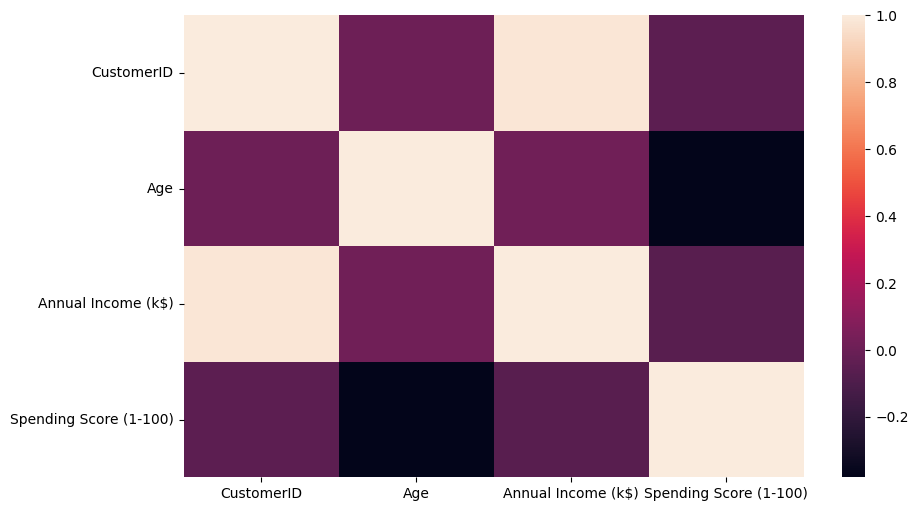

In [18]:
#Heatmap &Explo
plt.figure(figsize=(10,6))
heatmap=sns.heatmap(corr)
heatmap

Text(0, 0.5, 'Count')

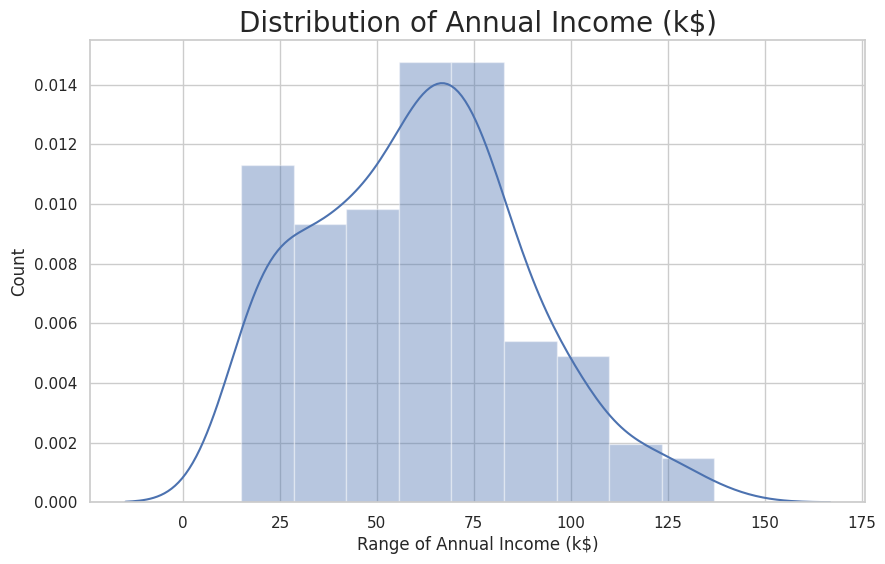

In [19]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data1['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)',fontsize=20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

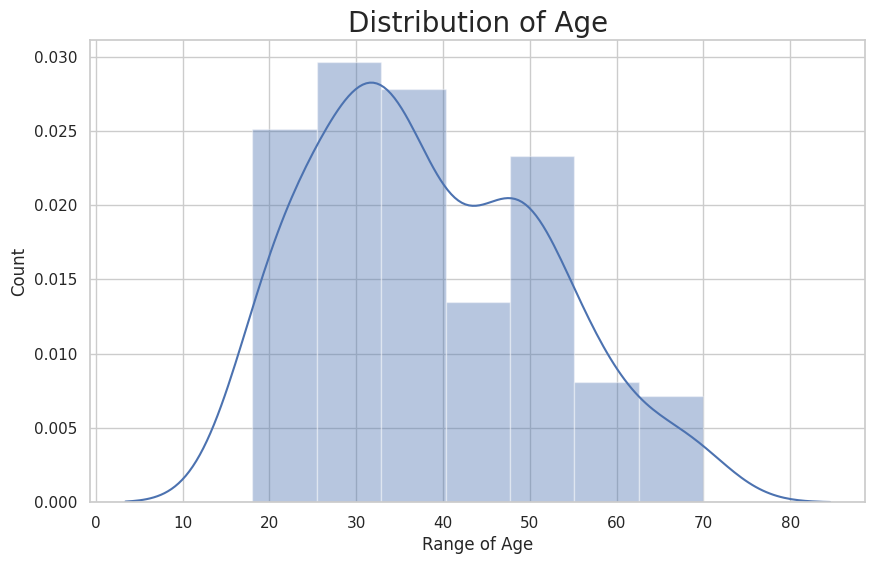

In [20]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data1['Age'])
plt.title('Distribution of Age',fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

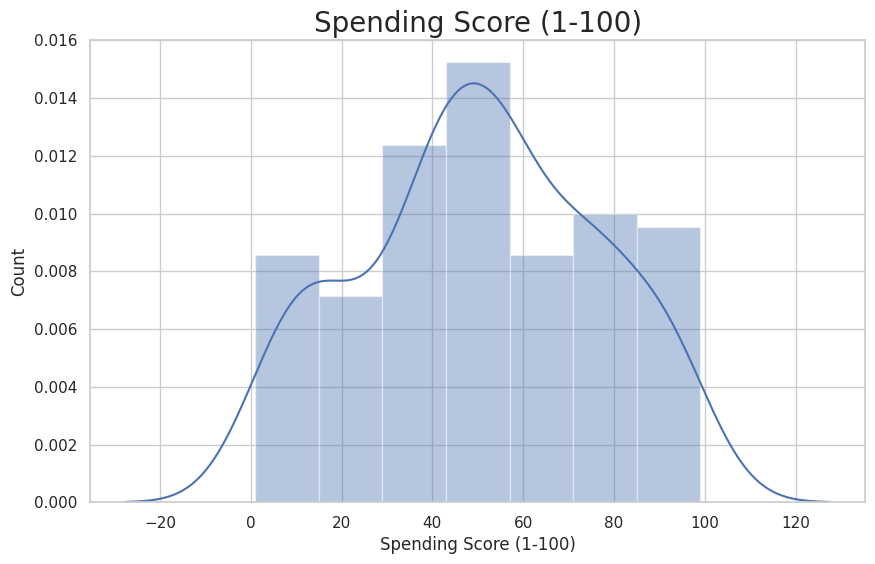

In [21]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.distplot(data1['Spending Score (1-100)'])
plt.title('Spending Score (1-100)',fontsize=20)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')

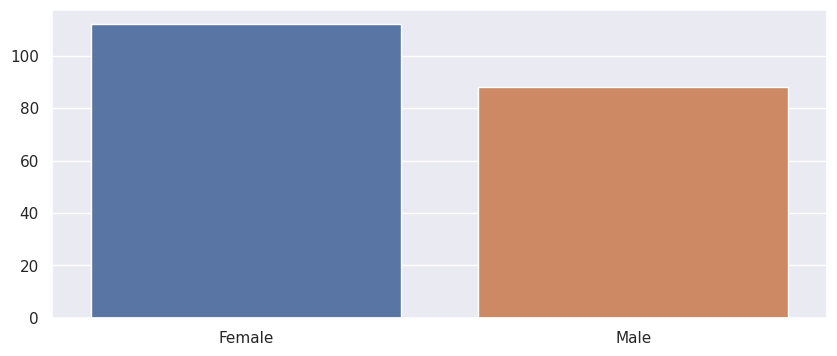

In [22]:
genders=data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index,y=genders.values)
plt.show()

In [23]:
X=data1[["Annual Income (k$)","Spending Score (1-100)"]]

In [24]:
X.head()

,Annual Income (k$),Spending Score (1-100)
154,78,16
76,54,53
105,62,42
163,81,93
86,57,58


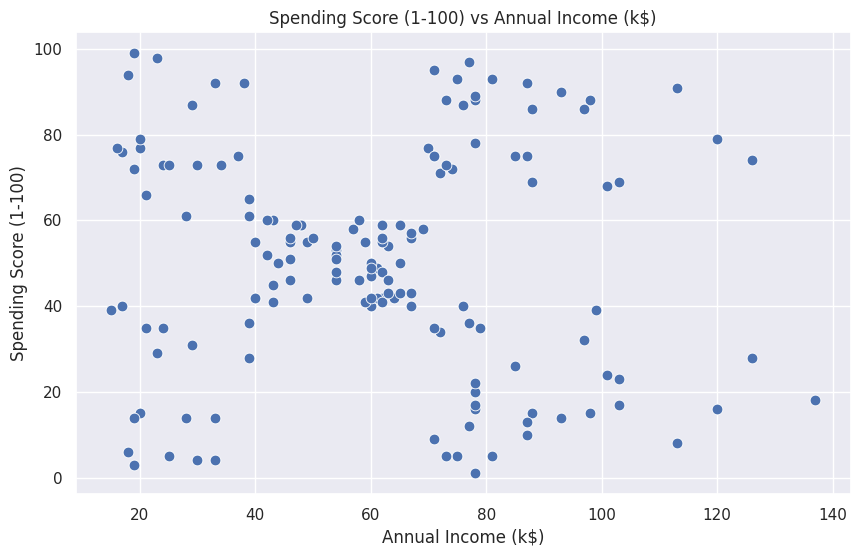

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', data =
X ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [27]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
y = kmeans.labels_

In [29]:
y

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int32)

In [30]:
#adding the labels to a column named label
data1["label"] = y

In [31]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
154,155,Female,47,78,16,1
76,77,Female,45,54,53,0
105,106,Female,21,62,42,1
163,164,Female,31,81,93,1
86,87,Female,55,57,58,0


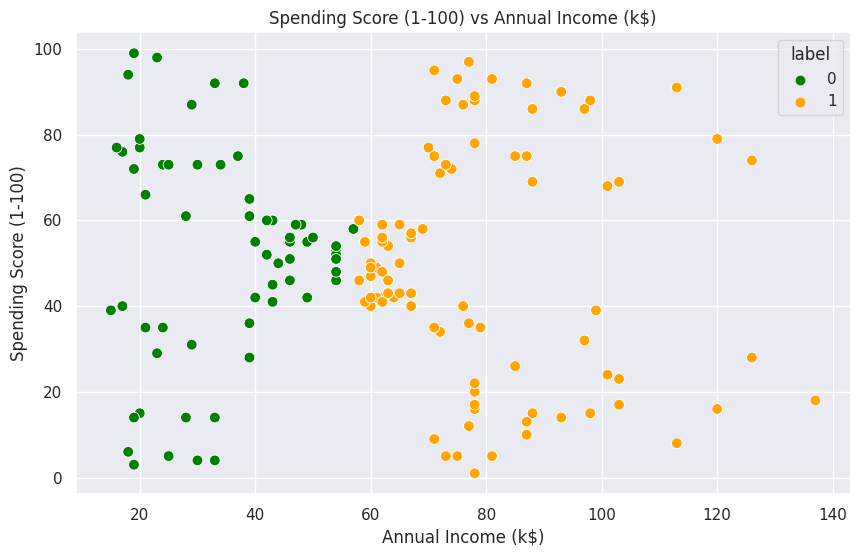

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',hue="label", palette=['green','orange'], legend='full',data = data1 ,s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [33]:

wcss=[]
for i in range(1,21):
  km=KMeans(n_clusters=i)
  km.fit(X)
  wcss.append(km.inertia_)

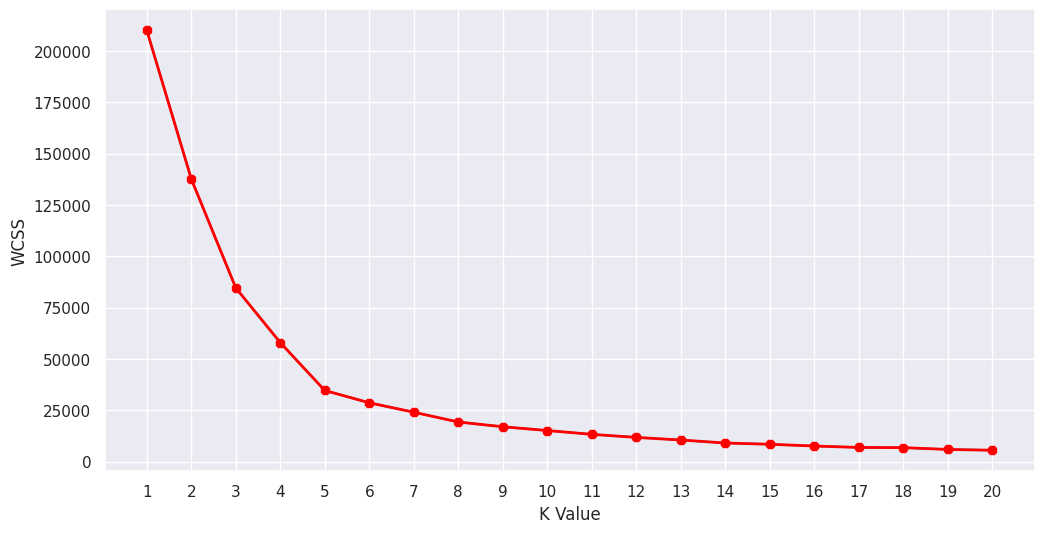

In [34]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,21),wcss)
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.ylabel("WCSS")
plt.show()

In [35]:
#Taking 4 clusters
kmeans_wcss=KMeans(n_clusters=4)
kmeans_wcss.fit(X)
y=kmeans_wcss.predict(X)
data1["label"] = y
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


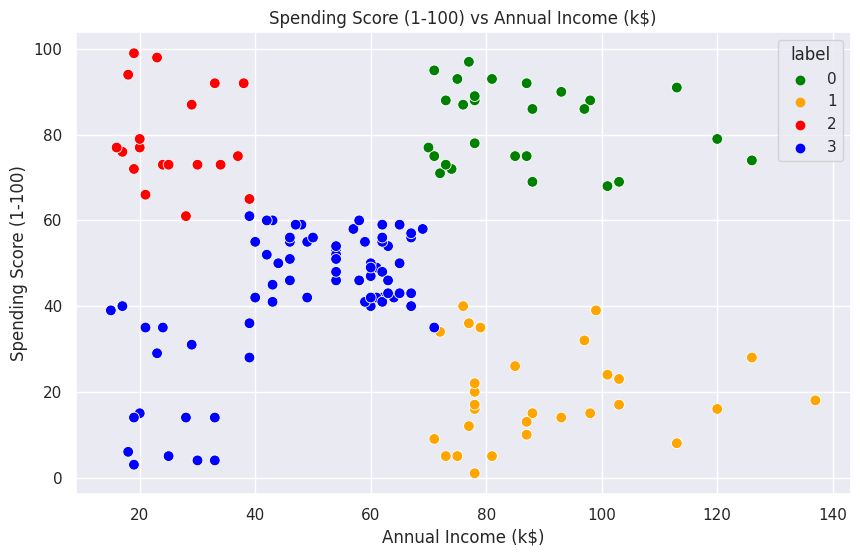

In [36]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
palette=['green','orange','red','blue'], legend='full',data = data1 ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [37]:
#Using K-Means++ for Elbow Curve & finding out the difference
#Taking the features
X1=data1[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [38]:
#We choose the k for which WSS starts to diminish
kmeans2 = KMeans(n_clusters=4)
y2 = kmeans2.fit_predict(X1)
data1["label"] = y2
#The data with labels
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


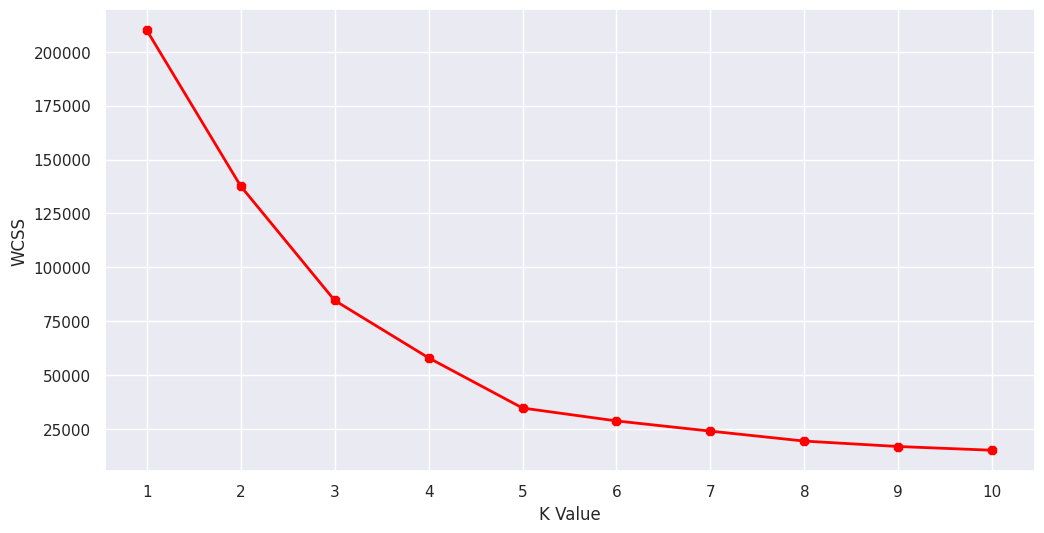

In [39]:


#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

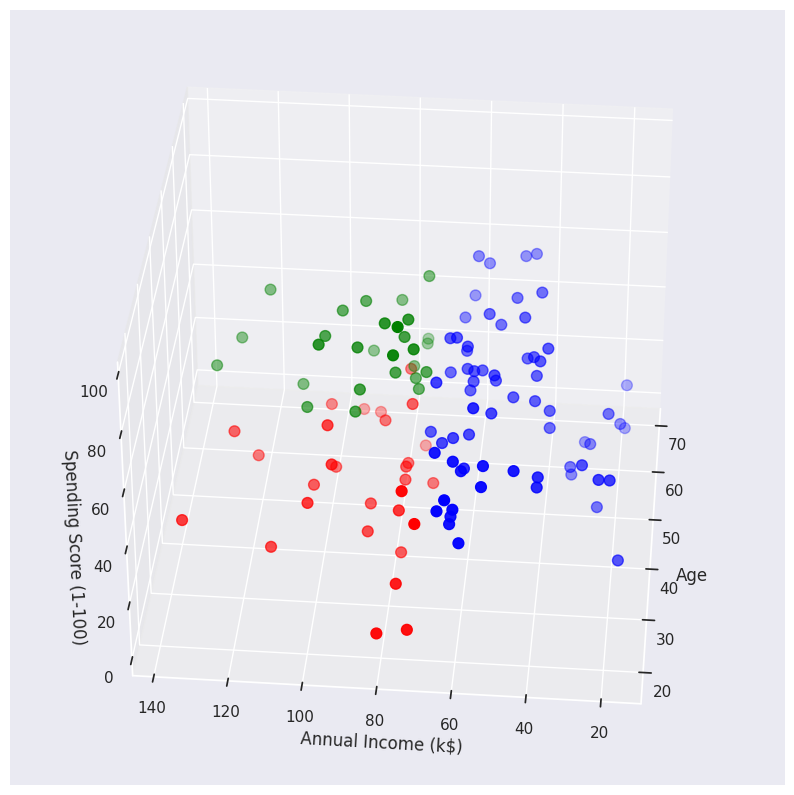

In [40]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1.Age[data1.label == 1], data1["Annual Income (k$)"][data1.label ==1], data1["Spending Score (1-100)"][data1.label == 1], c='red', s=60)
ax.scatter(data1.Age[data1.label == 2], data1["Annual Income (k$)"][data1.label ==2], data1["Spending Score (1-100)"][data1.label == 2], c='blue', s=60)
ax.scatter(data1.Age[data1.label == 3], data1["Annual Income (k$)"][data1.label ==3], data1["Spending Score (1-100)"][data1.label == 3], c='green', s=60)
ax.scatter(data1.Age[data1.label == 4], data1["Annual Income (k$)"][data1.label ==4], data1["Spending Score (1-100)"][data1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [41]:
df=data1.groupby(['label'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

In [42]:
df['N obs']=data1[['label','Gender']].groupby(['label']).count()

In [43]:
df

,Age,Annual Income (k$),Spending Score (1-100),N obs
label,,,,
0,25.192308,28.653846,72.115385,26
1,40.793103,89.931034,19.137931,29
2,44.955224,49.746269,42.313433,67
3,32.571429,85.857143,81.892857,28


In [44]:
#import plotly.graph_objs as go
import plotly.express as px

# Assuming data1 contains the dataset and has "Age", "Annual Income (k$)", "Spending Score (1-100)", and "label" columns

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(data1, x="Age", y="Annual Income (k$)", z="Spending Score (1-100)", color="label",
                    color_discrete_map={1: "red", 2: "blue", 3: "green", 4: "yellow"}, size_max=60)

# Set the view angle
fig.update_layout(scene_camera=dict(eye=dict(x=1.7, y=-1.5, z=1)))

# Set labels for the axes
fig.update_layout(scene=dict(xaxis_title="Age", yaxis_title="Annual Income (k$)", zaxis_title="Spending Score (1-100)"))

# Show the plot
fig.show()

Based on the updated table, it appears to show the data of individuals segmented into four clusters (label 0, 1, 2, and 3) based on their age, annual income, and spending score. Each cluster has a different number of observations (N obs).

For ease of understanding, let's name the clusters:

Cluster 0: Low Annual Income and High Spending Score
Cluster 1: High Annual Income and Low Spending Score
Cluster 2: Low Annual Income and Low Spending Score
Cluster 3: High Annual Income and High Spending Score

Market Analysis:

Cluster 0 (Low Annual Income and High Spending Score):
Individuals in this cluster have relatively low annual incomes but exhibit high spending scores. This group might include younger individuals or those who prioritize experiences and enjoyment over saving. They are likely to be more open to impulsive purchases and enjoy trying new products and services. Businesses targeting this segment should focus on offering attractive deals, discounts, and loyalty programs to encourage frequent spending.

Cluster 1 (High Annual Income and Low Spending Score):
This cluster represents individuals with high annual incomes but relatively low spending scores. These individuals are likely to be financially responsible and may prioritize saving and investment over excessive spending. Businesses targeting this segment should focus on promoting premium products and services that emphasize quality, status, and exclusivity.

Cluster 2 (Low Annual Income and Low Spending Score):
People in this cluster have both low annual incomes and low spending scores. This group is likely to be budget-conscious and careful with their expenses. They might be more sensitive to price changes and discounts. To cater to this segment, businesses can offer cost-effective solutions and emphasize the affordability and value of their products/services.

Cluster 3 (High Annual Income and High Spending Score):
This cluster comprises individuals with high annual incomes and high spending scores. They have the financial capacity to make significant purchases and indulge in premium products and services. To target this group effectively, businesses should focus on delivering high-quality, luxurious offerings and personalized experiences.

Overall, understanding these clusters can help businesses tailor their marketing strategies and product offerings to cater to the specific needs and preferences of each segment. It is crucial to perform further analysis and conduct market research to validate these assumptions and gain deeper insights into the behavior of each cluster before implementing marketing strategies.